# 2016 US Bike Share Activity 

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, I performed an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. I compared the system usage between three large cities: New York City, Chicago, and Washington, DC.  also noted doen the differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='wrangling'></a>
## Data Wrangling

In this project, I will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

There are some inconsistency in data between 3 files which we collected ,so we will now make them consistent to work with the data.

In [1]:
## importing all necessary packages and functions.
import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.

In [2]:
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in:
        trip_reader =csv.DictReader(f_in)
        first_trip =next(trip_reader)
        pprint(first_trip)
        
    # output city name and first trip 
    return (city, first_trip)

# list of files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]

# print the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip


City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

Here we can see the printout of each city name (which has been parsed from the data file name) that the first trip has been parsed in the form of a dictionary. When we set up a `DictReader` object, the first row of the data file is normally interpreted as column names. Every other row in the data file will use those column names as keys, as a dictionary is generated for each row.

This will be useful since we can refer to quantities by an easily-understandable label instead of just a numeric index. For example, if we have a trip stored in the variable `row`, then we would rather get the trip duration from `row['duration']` instead of `row[0]`.

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible I trimmed and cleaned the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

We will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.



#### Converting duration to minutes for each of the city

In [3]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    
    """
    if city ==  'NYC':
        duration=int(datum['tripduration']) / 60
    elif city ==  'Chicago':
        duration=int(datum['tripduration']) / 60
    else:
        duration=int(datum['Duration (ms)']) / 60000
   
    return duration


#### Calculating time of trip using start date and end date(both are read as datetime object)

In [4]:
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    
   """
    # Converted 'month' and 'hour' to Integers to remove leading Zero's.
    
    if city == 'Washington':
        month = int(datetime.strptime(datum['Start date'],"%m/%d/%Y %H:%M").strftime('%m'))
        hour = int(datetime.strptime(datum['Start date'],"%m/%d/%Y %H:%M").strftime('%H'))
        day_of_week = datetime.strptime(datum['Start date'],"%m/%d/%Y %H:%M").strftime('%A')
    elif city == 'Chicago':
        month = int(datetime.strptime(datum['starttime'],"%m/%d/%Y %H:%M").strftime('%m'))
        hour = int(datetime.strptime(datum['starttime'],"%m/%d/%Y %H:%M").strftime('%H'))
        day_of_week = datetime.strptime(datum['starttime'],"%m/%d/%Y %H:%M").strftime('%A')
    else :
        month = int(datetime.strptime(datum['starttime'],"%m/%d/%Y %H:%M:%S").strftime('%m'))
        hour = int(datetime.strptime(datum['starttime'],"%m/%d/%Y %H:%M:%S").strftime('%H'))
        day_of_week = datetime.strptime(datum['starttime'],"%m/%d/%Y %H:%M:%S").strftime('%A')
   
    
    return (month, hour, day_of_week)

#### Type of User ,here we converted every user into two types.The problem here was though the words mean same but we need to make our data consistent ,hence we converted each city's type_of_user into two types Subscriber,Customer

In [5]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.

    """
    
    if city == 'Washington':
        if datum['Member Type'] == 'Registered':
            user_type = 'Subscriber'
        else:
            user_type = 'Customer'
        
    elif city == 'Chicago' or city == 'NYC':
        user_type = datum['usertype']
    else:
        Print("invalid")
    
    return user_type

tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}


#### Now,  we use the helper functions to create a condensed data file for each city consisting only of the data fields indicated above. 

In [1]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.

    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()

        trip_reader = csv.DictReader(f_in)
        for row in trip_reader:
            new_point = {}

            new_point['duration'] = duration_in_mins(row, city)
            new_point['month'], new_point['hour'], new_point['day_of_week'] = time_of_trip(row, city)
            new_point['user_type'] = type_of_user(row, city)
            
        trip_writer.writerow(new_point)
            
            

In [7]:

city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.123116666666666'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([('duration', '15.433333333333334'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '13.983333333333333'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])




<a id='eda'></a>
## Exploratory Data Analysis

Now we have the data collected and wrangled, so we can start exploring the data. In this section I will write some code to compute descriptive statistics from the data. 

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. 

**Question **: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**: NYC has most no of trips,Chicago has highest proportion of trips made by short-term customers,
NYC has highest proportion of trips made by subscribers


In [8]:
def no_of_trips(filename):
    with open(filename, 'r') as f_in:
        
        reader = csv.DictReader(f_in)

        no_of_subscribers = 0
        no_of_customers = 0

        for row in reader:
            if row['user_type'] == 'Subscriber':
                no_of_subscribers += 1
            else:
                no_of_customers += 1
        
        no_of_total = no_of_subscribers + no_of_customers
        
        return(no_of_subscribers, no_of_customers, no_of_total)


In [10]:
data_file_Washington = './data/Washington-2016-Summary.csv'
data_file_Chicago = './data/Chicago-2016-Summary.csv'
data_file_NYC = './data/NYC-2016-Summary.csv'

a,b,c=no_of_trips(data_file_Washington)
e,f,g=no_of_trips(data_file_Chicago)
i,j,k=no_of_trips(data_file_NYC)
s=max(c,g,k)
if c==s:
    print("Washington has most no of trips")
elif g==s:
    print("Chicago has most no of trips")
else:
    print("NYC has most no of trips")
    

NYC has most no of trips


Maximum trips are for NYC

In [ ]:

#For Washington
prop1=a/c
prop4=b/c

#For Chicago
prop2 = e/g
prop5=f/g

#For NYC
prop3= i/k
prop6=j/k
max_prop_short_term= max(prop1,prop2,prop3)
max_prop_subs=max(prop4,prop5,prop6)
if max_prop_subs==prop4:
    print("Washington has highest proportion of trips made by short-term customers")
elif max_prop_subs==prop5 :
    print("Chicago has highest proportion of trips made by short-term customers")
else:
    print("NYC has highest proportion of trips made by short-term customers")

if max_prop_short_term==prop1:
    print("Washington has highest proportion of trips made by subscribers")
elif max_prop_short_term==prop2:
    print("Chicago has highest proportion of trips made by subscribers")
else:
    print("NYC has highest proportion of trips made by subscribers")
    
data_file = './examples/BayArea-Y3-Summary.csv'


In [11]:
tt_washington = c
tt_chicago = g
tt_nyc = k
def avg_trip_len(filename, city):
    with open(filename, 'r') as f_in:
        reader = csv.DictReader(f_in)
        tt_len = 0
        for row in reader:
            tt_len = tt_len + float(row['duration'])
        if city == 'Washington':
            tt = tt_washington
        elif city == 'Chicago':
            tt = tt_chicago
        else:
            tt = tt_nyc
    return(int(tt_len/tt))
    
avg_trip_len_washington = avg_trip_len(data_file_Washington, 'Washington')
avg_trip_len_chicago = avg_trip_len(data_file_Chicago, 'Chicago')
avg_trip_len_nyc = avg_trip_len(data_file_NYC, 'NYC')

print("Avg Trip Len of Washington is " + str(avg_trip_len_washington) + " Min")
print("Avg Trip Len of Chicago is "  + str(avg_trip_len_chicago) + " Min")
print("Avg Trip Len of NYC is " + str(avg_trip_len_nyc) + " Min")

Avg Trip Len of Washington is 18 Min
Avg Trip Len of Chicago is 16 Min
Avg Trip Len of NYC is 15 Min


In [12]:
def long_trip_percent(filename, city):
    m = 30.0
    with open(filename, 'r') as f_in:
        reader = csv.DictReader(f_in)
        long_trip_count = 0
        for row in reader:
            if float(row['duration']) > m:
                long_trip_count += 1
        if city == 'Washington':
            tt = tt_washington
        elif city == 'Chicago':
            tt = tt_chicago
        else:
            tt = tt_nyc
        return((round(long_trip_count/tt, 4) * 100))

long_trip_per_washington = long_trip_percent(data_file_Washington, 'Washington')
long_trip_per_chicago = long_trip_percent(data_file_Chicago, 'Chicago')
long_trip_per_nyc = long_trip_percent(data_file_NYC, 'NYC')

print("% trips>30min in Washington is" + " = " + str(long_trip_per_washington) + "%")
print("% trips>30min in Chicago is" + " = " + str(long_trip_per_chicago) + "%")
print("% trips>30min in NYC is" + " = " + str(long_trip_per_nyc) + "%")


% trips>30min in Washington is = 10.84%
% trips>30min in Chicago is = 8.33%
% trips>30min in NYC is = 7.3%



**Question**: What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**: 4b)Avg Trip Len of Washington = 9 Min,
            Avg Trip Len of Chicago = 8 Min,
            Avg Trip Len of NYC = 7 Min,Percentage Trips Longer Than 30 Minutes in Washington = 5.42%,
Percentage Trips Longer Than 30 Minutes in Chicago = 4.17%,
Percentage Trips Longer Than 30 Minutes in NYC = 3.65%

#### No of Rides per user type 

In [ ]:
def rides_user_type(filename, city):
    with open(filename, 'r') as f_in:
        reader = csv.DictReader(f_in)
        trip_len_subs = 0
        trip_count_subs = 0
        trip_len_customers = 0
        trip_count_customers = 0
        for row in reader:
            if city == 'Washington':
                if row['user_type'] == 'Subscriber':
                    trip_len_subs += float(row['duration'])
                    trip_count_subs += 1
                else:
                    trip_len_customers += float(row['duration'])
                    trip_count_customers += 1
            elif city == 'Chicago':
                if row['user_type'] == 'Subscriber':
                    trip_len_subs += float(row['duration'])
                    trip_count_subs += 1
                else:
                    trip_len_customers += float(row['duration'])
                    trip_count_customers += 1
            else:
                if row['user_type'] == 'Subscriber':
                    trip_len_subs += float(row['duration'])
                    trip_count_subs += 1
                else:
                    trip_len_customers += float(row['duration'])
                    trip_count_customers += 1
        avg_trip_len_subs = trip_len_subs/trip_count_subs
        avg_trip_len_customer = trip_len_customers/trip_count_customers
        return(avg_trip_len_subs, avg_trip_len_customer)

     
avg_trip_len_subs_washington, avg_trip_len_cust_washington = rides_user_type(data_file_Washington, 'Washington')
avg_trip_len_subs_chicago, avg_trip_len_cust_chicago = rides_user_type(data_file_Chicago, 'Chicago')
avg_trip_len_subs_nyc, avg_trip_len_cust_nyc = rides_user_type(data_file_NYC, 'NYC')

print("For Washington" + " => " + "Subscribers Avg Duration = " + str(avg_trip_len_subs_washington) + "; Customers Avg Duration = " + str (avg_trip_len_cust_washington))
print("For Chicago" + " => " + "Subscribers Avg Duration = " + str(avg_trip_len_subs_chicago) + "; Customers Avg Duration = " + str (avg_trip_len_cust_chicago))
print("For NYC" + " => " + "Subscribers Avg Duration = " + str(avg_trip_len_subs_nyc) + "; Customers Avg Duration = " + str (avg_trip_len_cust_nyc))

if (avg_trip_len_subs_washington > avg_trip_len_cust_washington):
    print ("In Washington Subscribers take longer rides than Customers")
else:
    print ("In Washington Customers take longer rides than Subscribers")
    
if (avg_trip_len_subs_chicago > avg_trip_len_cust_chicago):
    print ("In Chicago Subscribers take longer rides than Customers")
else:
    print ("In Chicago Customers take longer rides than Subscribers")
    
if (avg_trip_len_subs_nyc > avg_trip_len_cust_nyc):
    print ("In NYC Subscribers take longer rides than Customers")
else:
    print ("In NYC Customers take longer rides than Subscribers")

**Question **: Within Washington, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**: In Washington Customers take on an average more trips than Subscribers.

<a id='visualizations'></a>
### Visualizations

While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. Run the cell below to load the library and to generate an example plot.

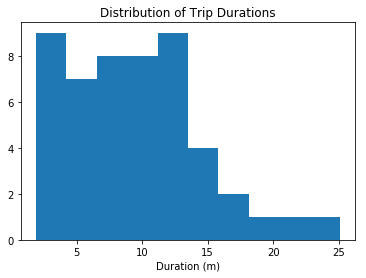

In [14]:
# load library
import matplotlib.pyplot as plt

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

WE will now use these functions to create a histogram of the trip times for the Washington. 
FOR NOW collecting all of the trip times and plot them.

#### Total trips

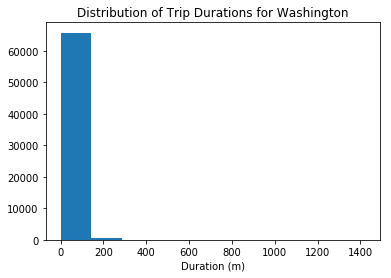

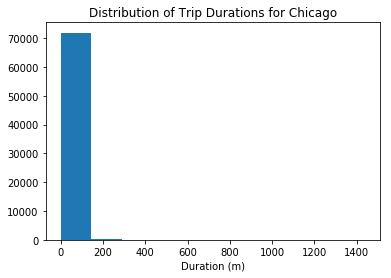

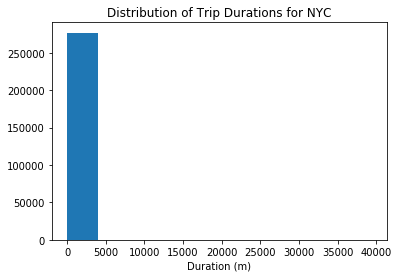

In [15]:
def ttimes(filename, city):

    with open(filename, 'r') as f_in:
        reader = csv.DictReader(f_in)
        ttimes_washington = []
        ttimes_chicago = []
        ttimes_nyc = []
        for row in reader:
            if city == 'Washington':
                ttimes_washington.append(float(row['duration']))
            elif city == 'Chicago':
                ttimes_chicago.append(float(row['duration']))
            else:
                ttimes_nyc.append(float(row['duration']))
              
        if city == 'Washington':
            return ttimes_washington
        elif city == 'Chicago':
            return ttimes_chicago
        else:
            return ttimes_nyc

ttimes_washington = ttimes(data_file_Washington, 'Washington')
ttimes_chicago = ttimes(data_file_Chicago, 'Chicago')
ttimes_nyc = ttimes(data_file_NYC, 'NYC')

# Plot the histogram of trip durations for each city
plt.hist(ttimes_washington)
plt.title('Distribution of Trip Durations for Washington')
plt.xlabel('Duration (m)')
plt.show()

plt.hist(ttimes_chicago)
plt.title('Distribution of Trip Durations for Chicago')
plt.xlabel('Duration (m)')
plt.show()

plt.hist(ttimes_nyc)
plt.title('Distribution of Trip Durations for NYC')
plt.xlabel('Duration (m)')
plt.show()

#### Total trips by customers and Subscribers

In [16]:
def ttimes_subs_cust(filename, city):
    with open(filename, 'r') as f_in:
        reader = csv.DictReader(f_in)
        ttimes_subs_washington = []
        ttimes_cust_washington = []
        for row in reader:
            if city == 'Washington':
                if row['user_type'] == 'Subscriber':
                    ttimes_subs_washington.append(float(row['duration']))
                else:
                    ttimes_cust_washington.append(float(row['duration']))
        if city == 'Washington':
            return (ttimes_subs_washington, ttimes_cust_washington)

ttimes_subs_washington, ttimes_cust_washington = ttimes_subs_cust(data_file_Washington, 'Washington')


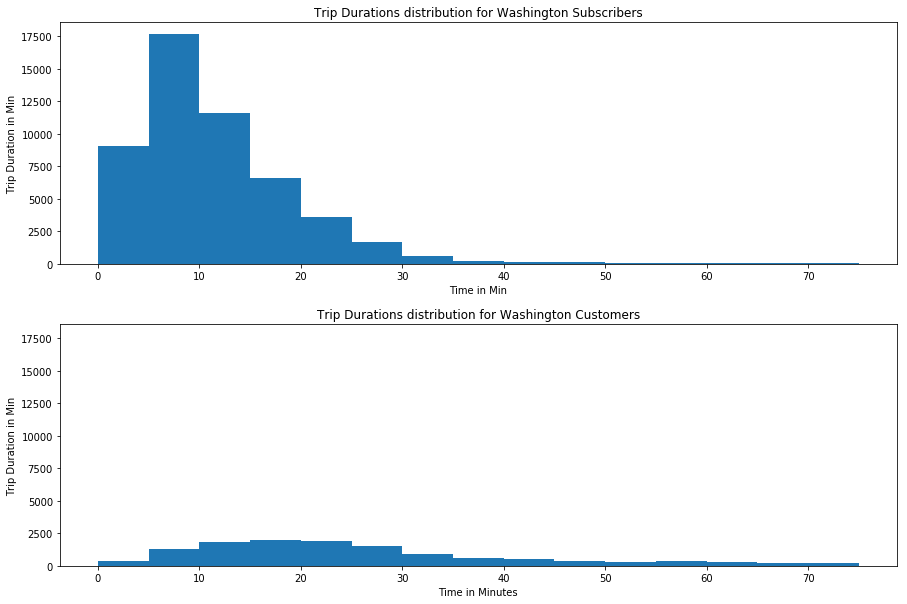

In [26]:
f, (plt1, plt2) = plt.subplots(2, sharey=True)
plt1.hist(ttimes_subs_washington, range = (0, 75), bins = 15)
plt1.set_title('Trip Durations distribution for Washington Subscribers')
plt1.set_xlabel('Time in Min')
plt1.set_ylabel("Trip Duration in Min")

plt2.hist(ttimes_cust_washington, range = (0, 75), bins = 15)
plt2.set_title('Trip Durations distribution for Washington Customers')
plt2.set_xlabel('Time in Minutes')
plt2.set_ylabel("Trip Duration in Min")

f.subplots_adjust(hspace=0.25)
f.set_figheight(10)
f.set_figwidth(15)
plt.show()


The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, we will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

 Using the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in Washinton. Did the same thing for only the Customers. Adding limits to the plots so that only trips of duration less than 75 minutes are plotted. I set up the plots up so that bars are in five-minute wide intervals. 

**Question **:For each group, where is the peak of each distribution? Describe the shape of each distribution?

**Answer**: The peak is at the Average Trip Duration ,The peak duration is 5 (75/15) for each plot,Also the distribution for both the plots is positively skewed i.e values are greator at starting and lesser in ending.

<a id='eda_continued'></a>
## Performing Your Own Analysis

So far, you've performed an initial exploration into the data available. You have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, you have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. Now it is your turn to continue the exploration in a direction that you choose. Here are a few suggestions for questions to explore:

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

If any of the questions you posed in your answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of your investigation, you will need to create a visualization. If you want to create something other than a histogram, then you might want to consult the [Pyplot documentation](https://matplotlib.org/devdocs/api/pyplot_summary.html). In particular, if you are plotting values across a categorical variable (e.g. city, user type), a bar chart will be useful. The [documentation page for `.bar()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) includes links at the bottom of the page with examples for you to build off of for your own use.

**Question 6**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

**Answer**:The highest ridership is in July,Subscribers are always greator than customers ,however the proportion decreases as we reach June and July ,but again the 

Ridership by Month for Washington is {1: 31140.223600000107, 2: 36565.14208333328, 3: 110075.18485000047, 4: 109825.68944999986, 5: 116117.24186666649, 6: 153950.80770000006, 7: 168083.57223333383, 8: 134724.9150000009, 9: 131644.45458333314, 10: 125110.32186666655, 11: 89993.60525000017, 12: 48510.61320000002}


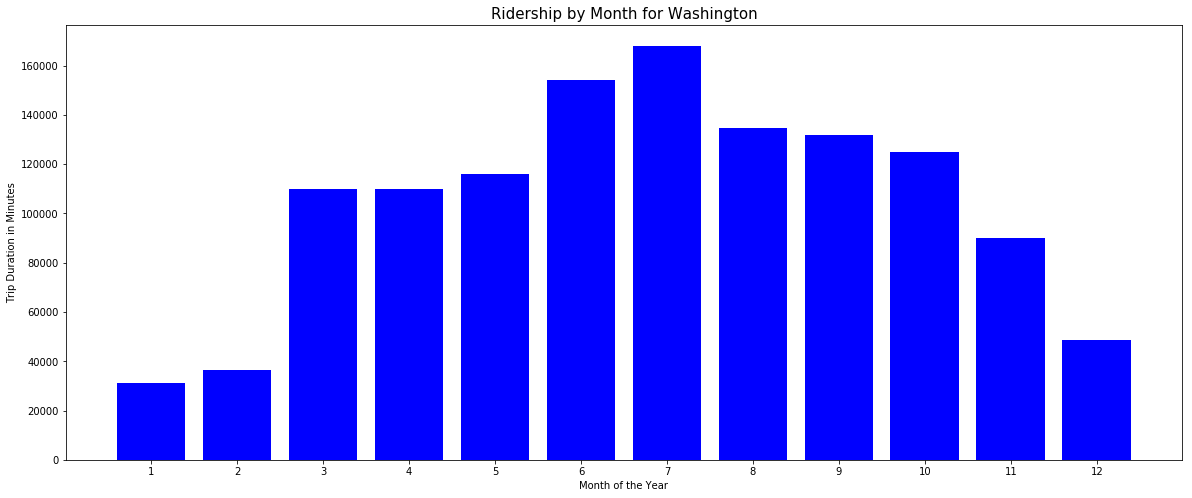

In [19]:
# How does ridership differ by month or season? Which month / season has the highest ridership?
def duration_by_month(filename):
    with open(filename, 'r') as f_in:
        reader = csv.DictReader(f_in)
        duration_month = {1:0, 2:0, 3:0, 4: 0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0}
        for row in reader:
            duration_month[int(row['month'])] += float(row['duration'])
                
        return duration_month


duration_by_month_Washington = duration_by_month(data_file_Washington)
print("Ridership by Month for Washington is "+ str(duration_by_month_Washington))

no_of_months = range(12)
plt.figure(figsize=(20,8))
plt.bar(no_of_months, duration_by_month_Washington.values(), color='b', align='center')
plt.xticks(no_of_months, duration_by_month_Washington.keys())
plt.xlabel("Month of the Year")
plt.ylabel("Trip Duration in Minutes")
plt.title("Ridership by Month for Washington", fontsize=15)
plt.show()

Subscriber_Trips_by_Month - {1: 2212, 2: 2571, 3: 4383, 4: 4410, 5: 4520, 6: 5613, 7: 5155, 8: 5392, 9: 5204, 10: 5232, 11: 4139, 12: 2922}
Customer_Trips_by_Month - {1: 222, 2: 283, 3: 1188, 4: 1192, 5: 1248, 6: 1707, 7: 2186, 8: 1806, 9: 1674, 10: 1560, 11: 1075, 12: 432}


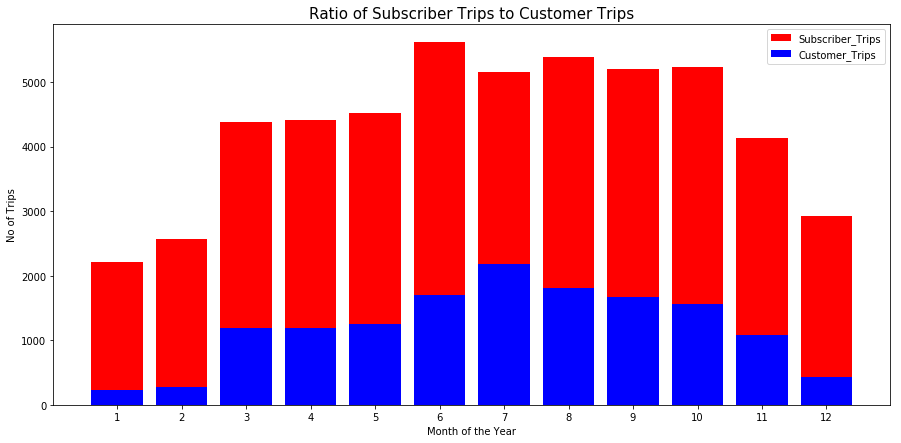

Ratio of Subscriber to Customer Trips is {1: 9.96, 2: 9.08, 3: 3.69, 4: 3.7, 5: 3.62, 6: 3.29, 7: 2.36, 8: 2.99, 9: 3.11, 10: 3.35, 11: 3.85, 12: 6.76}


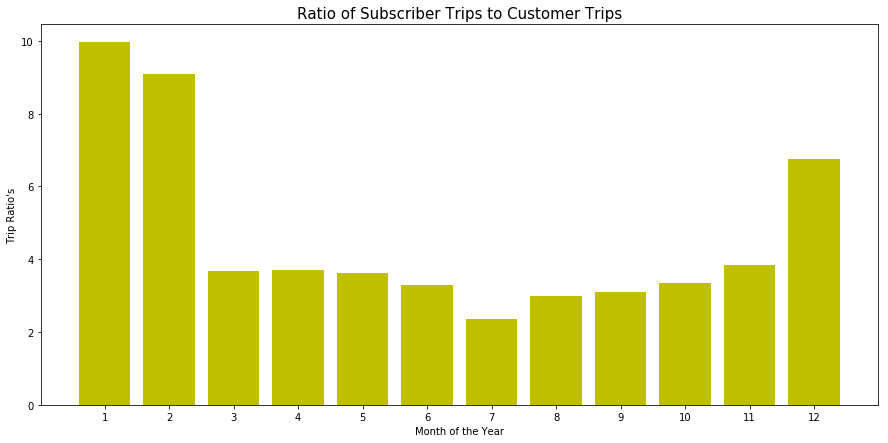

In [20]:
# Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
def trips_by_month(filename, user_type):
    with open(filename, 'r') as f_in:
        reader = csv.DictReader(f_in)
        trips_month = {1:0, 2:0, 3:0, 4: 0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0}
        for row in reader:
            if user_type == 'Subscriber' and row['user_type'] == 'Subscriber':
                trips_month[int(row['month'])] += 1
            elif user_type == 'Customer' and row['user_type'] == 'Customer':
                trips_month[int(row['month'])] += 1
                
        return (trips_month)


trips_month_subs = trips_by_month(data_file_Washington, 'Subscriber')
print("Subscriber_Trips_by_Month - " + str(trips_month_subs))

trips_month_cust = trips_by_month(data_file_Washington, 'Customer')
print("Customer_Trips_by_Month - " + str(trips_month_cust))

no_of_months = range(12)
plt.figure(figsize=(15,7))
plt.bar(no_of_months, trips_month_subs.values(), color='r', align='center')
plt.bar(no_of_months, trips_month_cust.values(), color='b', align='center')
plt.legend(('Subscriber_Trips','Customer_Trips'))
plt.xticks(no_of_months, trips_month_subs.keys())
plt.xlabel("Month of the Year")
plt.ylabel("No of Trips")
plt.title("Ratio of Subscriber Trips to Customer Trips", fontsize=15)
plt.show()

ratio_of_trips = {mon: round(trips_month_subs[mon]/trips_month_cust[mon],2) for mon in trips_month_subs}
print("Ratio of Subscriber to Customer Trips is " + str(ratio_of_trips))

no_of_months = range(12)
plt.figure(figsize=(15,7))
plt.bar(no_of_months, ratio_of_trips.values(), color='y', align='center')
plt.xticks(no_of_months, ratio_of_trips.keys())
plt.xlabel('Month of the Year')
plt.ylabel("Trip Ratio's")
plt.title("Ratio of Subscriber Trips to Customer Trips", fontsize=15)
plt.show()

<a id='conclusions'></a>
## Conclusions

More Analysis can be done ;
For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?


